../Data/sensorA.mat
acetone
Split
RandomFlag
False


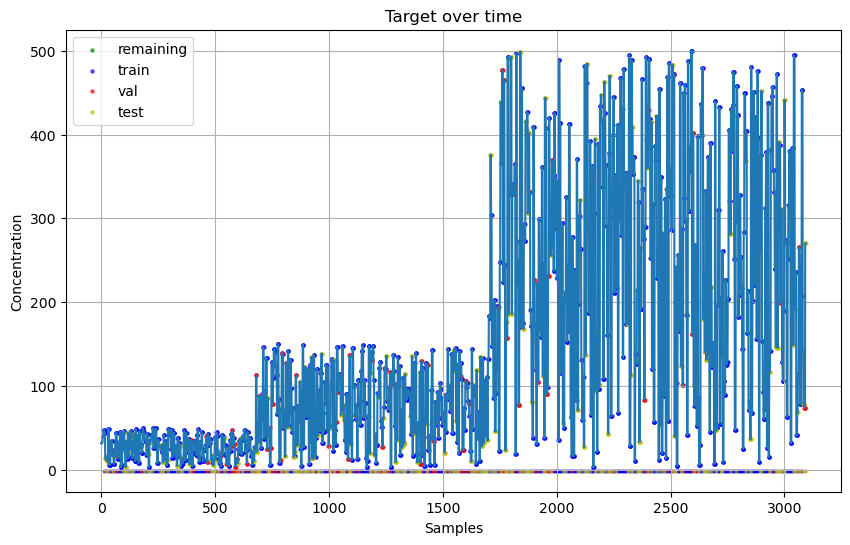

In [1]:
from pathlib import Path
import sys
import matplotlib.pyplot as plt
import numpy as np
import json
from sklearn.metrics import mean_squared_error

# Add the path to the folder containing the script
script_path = Path('../PreProcessing').resolve()
sys.path.insert(0, str(script_path))
import loadDataFull

script_path = Path('../Networks').resolve()
sys.path.insert(0, str(script_path))
from TCOCNN import TCOCNNClass

# DataLocation
locationData = "../Data/"

loadStruct = {}
# Struct DataLocation
loadStruct["fileNameDataAll"] = [locationData + "sensorA.mat"]
loadStruct["fileNameTargetAll"] = [locationData + "targets.mat"]

# Struct DataLocation
#loadStruct["fileNameDataAll"] = [locationData + "sensorA.mat",locationData + "sensorA.mat"]
#loadStruct["fileNameTargetAll"] = [locationData + "targets.mat",locationData + "targets.mat"]
loadStruct["targetGas"] = 'acetone'

# Used Method %see LoadDataFull 1: 70% 10% 20% Split
loadStruct["loadMethod"] = 1

# Expected Input Dimensions
loadStruct["dataSize"] = [4, 1440]

# Expected Output Dimensions
loadStruct["Outputsize"] = 1

# Specify Regression or Classification
loadStruct["Regression"] = True

# SaveFlag 
loadStruct["saveFlag"] = True

# Random Flag; False: Reproducible random Samples; True: in every execution Random
loadStruct["randomFlag"] = False

# NormalizeInput 
loadStruct["normFlag"] = True

loadStruct["OcclusionFlag"] = False

loadStruct["saveName"] = locationData + "Szenario_SA_1_Acetone.mat"

# Not the exact split is performed than in the original data (~20 UGMs less in test Set)
[data, target] = loadDataFull.load_Data_Full(loadStruct)


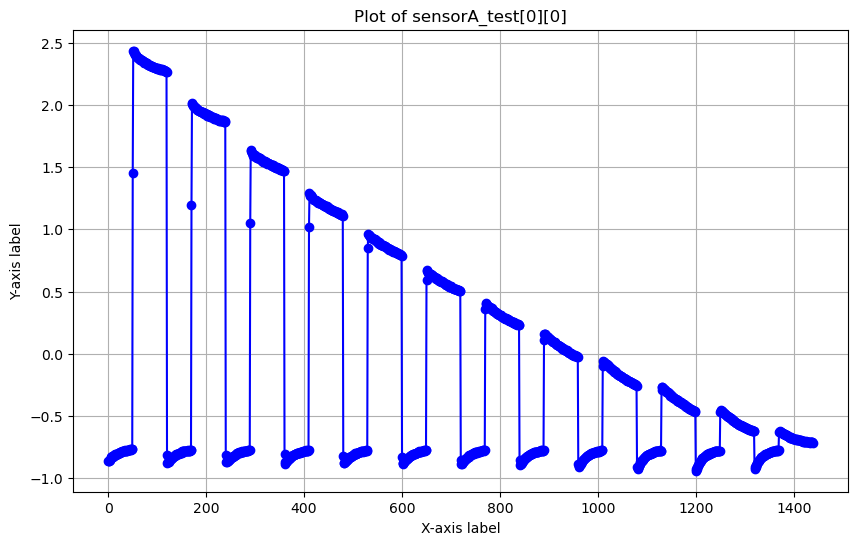

In [2]:
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(data["test"][0,0,:,0], marker='o', linestyle='-', color='b')  # Customize the plot as needed
plt.xlabel('X-axis label')  # Customize as needed
plt.ylabel('Y-axis label')  # Customize as needed
plt.title('Plot of sensorA_test[0][0]')  # Customize as needed
plt.grid(True)
plt.show()


In [3]:

model = TCOCNNClass((4,1440,1), 1, regression=True)

In [4]:
#model.optimize_model(data["train"],target["train"],data["val"],target["val"],10)

In [5]:
with open('acetoneParams.json', 'r') as f:
        data_dict = json.load(f)


model.build_net(data_dict)
model.compile_model(data_dict['initial_learning_rate'])
model.train(data['train'], target['train'])

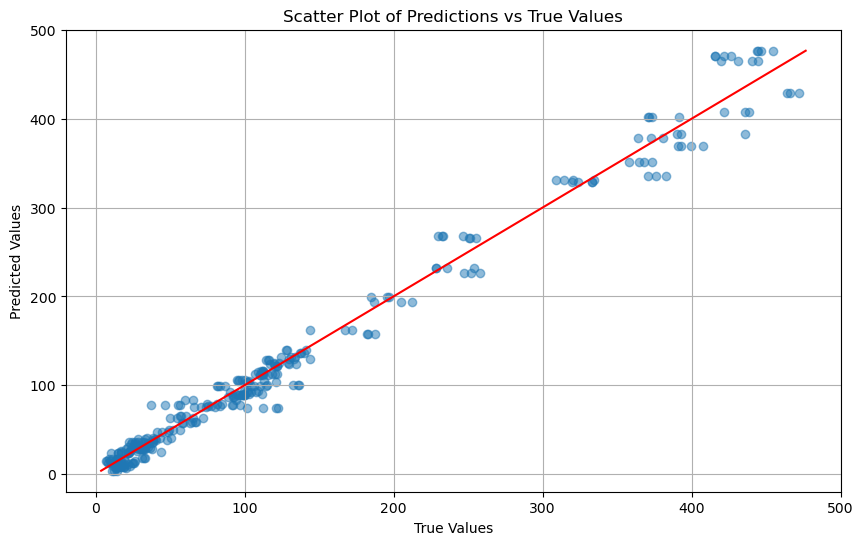

Root Mean Squared Error (RMSE): 16.29303066699136


In [6]:
pred = model.predict(data["val"])
# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(pred, target["val"], alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predictions vs True Values')
plt.plot([min(target["val"]), max(target["val"])], [min(target["val"]), max(target["val"])], color='red')  # Line of perfect prediction
plt.grid(True)
plt.show()

rmse = np.sqrt(mean_squared_error(pred, target['val']))
print(f'Root Mean Squared Error (RMSE): {rmse}')

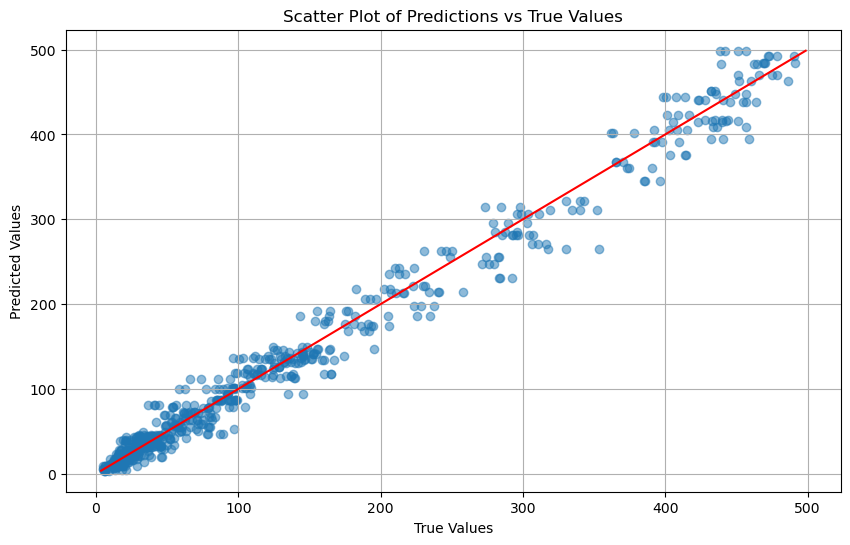

Root Mean Squared Error (RMSE): 18.63266225712339


In [7]:
pred = model.predict(data["test"])
# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(pred, target["test"], alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predictions vs True Values')
plt.plot([min(target["test"]), max(target["test"])], [min(target["test"]), max(target["test"])], color='red')  # Line of perfect prediction
plt.grid(True)
plt.show()
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(pred, target['test']))
print(f'Root Mean Squared Error (RMSE): {rmse}')